In [1]:
from statistics import median

import pandas as pd

## merge up and down

In [2]:
df1 = pd.DataFrame({'A':[1,2],'B':[3,4]})
df2 = pd.DataFrame({'A':[5,6],'B':[7,8]})
print(df1)
print('--------')
print(df2)

   A  B
0  1  3
1  2  4
--------
   A  B
0  5  7
1  6  8


In [3]:
result = pd.concat([df1,df2],axis=0,ignore_index=True)
print(result)

   A  B
0  1  3
1  2  4
2  5  7
3  6  8


## merge left and right

In [4]:
df1 = pd.DataFrame({'A':[1,2]})
df2 = pd.DataFrame({'B':[7,8]})
print(df1)
print('--------')
print(df2)

   A
0  1
1  2
--------
   B
0  7
1  8


In [5]:
result = pd.concat([df1,df2],axis=1)
print(result)

   A  B
0  1  7
1  2  8


## merge based on some conditions

In [6]:
df1 = pd.DataFrame({
    'id':[1,2,3],
    'name':['Alice','Bob','Charlie'],
    'score':[85,90,95]
})

df2 = pd.DataFrame({
    'user_id':[2,3,4],
    'name':['Bob','Charlie','David'],
    'age':[25,30,35]
})
print(df1)
print('----------------------')
print(df2)

   id     name  score
0   1    Alice     85
1   2      Bob     90
2   3  Charlie     95
----------------------
   user_id     name  age
0        2      Bob   25
1        3  Charlie   30
2        4    David   35


In [7]:
result = pd.merge(
    df1,df2,
    left_on=['id','name'],
    right_on=['user_id','name'],
    how='inner'
)
print(result)

   id     name  score  user_id  age
0   2      Bob     90        2   25
1   3  Charlie     95        3   30


In [8]:
result = result[['id','name','age','score']]
print(result)

   id     name  age  score
0   2      Bob   25     90
1   3  Charlie   30     95


## groupby

In [9]:
df = pd.DataFrame({
    'Category':['A','B','A','B','A'],
    'Value':[10,20,30,40,50],
    'Value2':['high','low','high','low','low']
})
print(df)

  Category  Value Value2
0        A     10   high
1        B     20    low
2        A     30   high
3        B     40    low
4        A     50    low


In [10]:
grouped = df.groupby('Category')
print(grouped)

In [11]:
res = grouped['Value']
print(res)

In [12]:
res = df.groupby('Category')['Value'].sum()
print(type(res))
print(res)

<class 'pandas.core.series.Series'>
Category
A    90
B    60
Name: Value, dtype: int64


In [13]:
res = pd.DataFrame(res)
print(type(res))
print(res)

<class 'pandas.core.frame.DataFrame'>
          Value
Category       
A            90
B            60


## apply

In [14]:
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6]
})
print(df)

   A  B
0  1  4
1  2  5
2  3  6


In [15]:
res = df.apply(func=lambda x:x.sum(),axis=0)
print(type(res))
print(res)

<class 'pandas.core.series.Series'>
A     6
B    15
dtype: int64


In [16]:
res = df.apply(func=lambda x:x.sum(),axis=1)
print(type(res))
print(res)

<class 'pandas.core.series.Series'>
0    5
1    7
2    9
dtype: int64


## basic operation

In [17]:
data = [
    {'Name': 'Alice', 'Age': 25, 'Occupation': 'Engineer'},
    {'Name': 'Bob', 'Age': 30, 'Occupation': 'Doctor'},
    {'Name': 'Charlie', 'Age': 35, 'Occupation': 'Teacher'}
]

df = pd.DataFrame(data, index=['A', 'B', 'C'])

In [18]:
df.head()

,Name,Age,Occupation
A,Alice,25,Engineer
B,Bob,30,Doctor
C,Charlie,35,Teacher


In [19]:
df.tail()

,Name,Age,Occupation
A,Alice,25,Engineer
B,Bob,30,Doctor
C,Charlie,35,Teacher


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, A to C
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        3 non-null      object
 1   Age         3 non-null      int64 
 2   Occupation  3 non-null      object
dtypes: int64(1), object(2)
memory usage: 96.0+ bytes


In [21]:
df.describe()

,Age
count,3.0
mean,30.0
std,5.0
min,25.0
25%,27.5
50%,30.0
75%,32.5
max,35.0


## look through by column

In [22]:
df['Name']

A      Alice
B        Bob
C    Charlie
Name: Name, dtype: object

In [23]:
df[['Name']]

,Name
A,Alice
B,Bob
C,Charlie


In [24]:
df[['Name', 'Occupation']]

,Name,Occupation
A,Alice,Engineer
B,Bob,Doctor
C,Charlie,Teacher


## look through by row

In [25]:
df.loc['A']

Name             Alice
Age                 25
Occupation    Engineer
Name: A, dtype: object

In [26]:
df.loc[['A']]

,Name,Age,Occupation
A,Alice,25,Engineer


In [27]:
df.iloc[[0]]

,Name,Age,Occupation
A,Alice,25,Engineer


In [28]:
df.iloc[[0, 2]]

,Name,Age,Occupation
A,Alice,25,Engineer
C,Charlie,35,Teacher


## look through with some conditions

In [29]:
df.loc[df['Age'] >= 30]

,Name,Age,Occupation
B,Bob,30,Doctor
C,Charlie,35,Teacher


In [30]:
df.loc[df['Age'] >= 30, 'Name']

B        Bob
C    Charlie
Name: Name, dtype: object

## add column

In [31]:
df['Salary'] = [3000, 10000, 6500]

In [32]:
df.head()

,Name,Age,Occupation,Salary
A,Alice,25,Engineer,3000
B,Bob,30,Doctor,10000
C,Charlie,35,Teacher,6500


## none or not

In [33]:
df['Salary'] = [3000, 10000, None]
df.head()

,Name,Age,Occupation,Salary
A,Alice,25,Engineer,3000.0
B,Bob,30,Doctor,10000.0
C,Charlie,35,Teacher,NaN


In [34]:
df.isna()

,Name,Age,Occupation,Salary
A,False,False,False,False
B,False,False,False,False
C,False,False,False,True


In [35]:
df.isna().sum()

Name          0
Age           0
Occupation    0
Salary        1
dtype: int64

## delete

In [36]:
demo = df.dropna()
demo.head()

,Name,Age,Occupation,Salary
A,Alice,25,Engineer,3000.0
B,Bob,30,Doctor,10000.0


In [37]:
df.head()

,Name,Age,Occupation,Salary
A,Alice,25,Engineer,3000.0
B,Bob,30,Doctor,10000.0
C,Charlie,35,Teacher,NaN


## impute

In [38]:
df.fillna(8000, inplace=True)
df.head()

,Name,Age,Occupation,Salary
A,Alice,25,Engineer,3000.0
B,Bob,30,Doctor,10000.0
C,Charlie,35,Teacher,8000.0


In [39]:
df['Salary'] = [3000, None, 6500]
df.head()

,Name,Age,Occupation,Salary
A,Alice,25,Engineer,3000.0
B,Bob,30,Doctor,NaN
C,Charlie,35,Teacher,6500.0


In [40]:
demo = df.ffill()
demo.head()

,Name,Age,Occupation,Salary
A,Alice,25,Engineer,3000.0
B,Bob,30,Doctor,3000.0
C,Charlie,35,Teacher,6500.0


In [41]:
df['Salary'] = [3000, None, 6500]
df.head()

,Name,Age,Occupation,Salary
A,Alice,25,Engineer,3000.0
B,Bob,30,Doctor,NaN
C,Charlie,35,Teacher,6500.0


In [42]:
df.bfill(inplace=True)
df.head()

,Name,Age,Occupation,Salary
A,Alice,25,Engineer,3000.0
B,Bob,30,Doctor,6500.0
C,Charlie,35,Teacher,6500.0


## mod, mean, medium

In [43]:
df.head()

,Name,Age,Occupation,Salary
A,Alice,25,Engineer,3000.0
B,Bob,30,Doctor,6500.0
C,Charlie,35,Teacher,6500.0


In [44]:
salary_mean = df['Salary'].mean()
print(f'Mean:{salary_mean}')

Mean:5333.333333333333


In [45]:
salary_medium = df['Salary'].median()
print(salary_medium)

6500.0


In [46]:
salary_mod = df['Salary'].mode()[0]
print(salary_mod)

6500.0


## handling incorrect time data

In [47]:
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Date': ['2024-09-23', '2024-13-01', 'not_a_date']
}

df = pd.DataFrame(data)
df.head()

,Name,Date
0,Alice,2024-09-23
1,Bob,2024-13-01
2,Charlie,not_a_date


In [48]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df.head()

,Name,Date
0,Alice,2024-09-23
1,Bob,NaT
2,Charlie,NaT


## handling incorrect number data

In [49]:
data = {
    'product': ['A', 'B', 'C'],
    'price': ['$1,000', '$2,500', 'not_a_price']
}

df = pd.DataFrame(data)
df.head()

,product,price
0,A,"$1,000"
1,B,"$2,500"
2,C,not_a_price


In [50]:
df['price'] = df['price'].str.replace('$', '').str.replace(',', '')
df.head()

,product,price
0,A,1000
1,B,2500
2,C,not_a_price


In [51]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df.head()

,product,price
0,A,1000.0
1,B,2500.0
2,C,NaN


In [52]:
df.isna()

,product,price
0,False,False
1,False,False
2,False,True


In [53]:
df = df.ffill()
df.head()

,product,price
0,A,1000.0
1,B,2500.0
2,C,2500.0


## handling other incorrect data

In [54]:
import numpy as np

In [55]:
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, -5, 30, -10]
}

df = pd.DataFrame(data)
df.head()

,Name,Age
0,Alice,25
1,Bob,-5
2,Charlie,30
3,David,-10


In [56]:
df.loc[df['Age'] < 0, 'Age'] = np.nan
df.head()

,Name,Age
0,Alice,25.0
1,Bob,NaN
2,Charlie,30.0
3,David,NaN


## handling other incorrect data

In [57]:
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Gender': ['F', 'M', 'M', 'F']
}

df = pd.DataFrame(data)
df.head()

,Name,Gender
0,Alice,F
1,Bob,M
2,Charlie,M
3,David,F


In [58]:
df['Gender'] = df['Gender'].replace({'M': 'Male', 'F': 'Female'})
df.head()

,Name,Gender
0,Alice,Female
1,Bob,Male
2,Charlie,Male
3,David,Female


## handling other incorrect data

In [59]:
data = {
    'product': ['A', 'B', 'C', 'D'],
    'price': [500, -150, 12000, 3000]
}

df = pd.DataFrame(data)
df.head()

,product,price
0,A,500
1,B,-150
2,C,12000
3,D,3000


In [60]:
df.loc[(df['price'] < 0) | (df['price'] > 10000), 'price']

1     -150
2    12000
Name: price, dtype: int64

In [61]:
df.loc[(df['price'] < 0) | (df['price'] > 10000), 'price'] = np.nan
df.head()

,product,price
0,A,500.0
1,B,NaN
2,C,NaN
3,D,3000.0


## Handling duplicates

In [62]:
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'Alice', 'Bob'],
    'Age': [25, 30, 35, 25, 30],
    'Occupation': ['Engineer', 'Doctor', 'Teacher', 'Engineer', 'Doctor']
}

df = pd.DataFrame(data)
df.head()

,Name,Age,Occupation
0,Alice,25,Engineer
1,Bob,30,Doctor
2,Charlie,35,Teacher
3,Alice,25,Engineer
4,Bob,30,Doctor


In [63]:
duplicates = df.duplicated()
print(duplicates.sum())
duplicates

2


0    False
1    False
2    False
3     True
4     True
dtype: bool

In [64]:
column_duplicates = df.duplicated(subset=['Name'])
column_duplicates

0    False
1    False
2    False
3     True
4     True
dtype: bool

In [65]:
df.drop_duplicates(keep='first', inplace=True)
df.head()

,Name,Age,Occupation
0,Alice,25,Engineer
1,Bob,30,Doctor
2,Charlie,35,Teacher


## filter

In [66]:
data = {
    'species': ['Adelie', 'Gentoo', 'Chinstrap', 'Adelie', 'Gentoo'],
    'body_mass_g': [3700, 5000, 3800, 4200, 4500]
}

df = pd.DataFrame(data)
df.head()

,species,body_mass_g
0,Adelie,3700
1,Gentoo,5000
2,Chinstrap,3800
3,Adelie,4200
4,Gentoo,4500


In [67]:
peng_filt = df[df['species'] == 'Adelie']
peng_filt.head()

,species,body_mass_g
0,Adelie,3700
3,Adelie,4200


In [68]:
mult_filt = df[(df['species'] == 'Adelie') & (df['body_mass_g'] > 4000)]
mult_filt.head()

,species,body_mass_g
3,Adelie,4200


In [69]:
query_filt = df.query('body_mass_g > 4000 & species == "Gentoo"')
query_filt.head()

,species,body_mass_g
1,Gentoo,5000
4,Gentoo,4500


## group

In [70]:
data = {
    'species': ['Adelie', 'Gentoo', 'Chinstrap', 'Adelie', 'Gentoo'],
    'island': ['Torgersen', 'Biscoe', 'Dream', 'Torgersen', 'Biscoe'],
    'sex': ['Male', 'Female', 'Female', 'Male', 'Female'],
    'body_mass_g': [3700, 5000, 3800, 4200, 4500],
    'flipper_length_mm': [181, 210, 195, 190, 200]
}

df = pd.DataFrame(data)
df.head()

,species,island,sex,body_mass_g,flipper_length_mm
0,Adelie,Torgersen,Male,3700,181
1,Gentoo,Biscoe,Female,5000,210
2,Chinstrap,Dream,Female,3800,195
3,Adelie,Torgersen,Male,4200,190
4,Gentoo,Biscoe,Female,4500,200


In [71]:
num_cols = df.select_dtypes(include=['int64', 'float64'])

mult_group = df.groupby(['island', 'sex'])[num_cols.columns].mean()

mult_group

,,body_mass_g,flipper_length_mm
island,sex,,
Biscoe,Female,4750.0,205.0
Dream,Female,3800.0,195.0
Torgersen,Male,3950.0,185.5


In [72]:
sorted_penguins = df.sort_values(by='body_mass_g', ascending=False)
sorted_penguins.head()

,species,island,sex,body_mass_g,flipper_length_mm
1,Gentoo,Biscoe,Female,5000,210
4,Gentoo,Biscoe,Female,4500,200
3,Adelie,Torgersen,Male,4200,190
2,Chinstrap,Dream,Female,3800,195
0,Adelie,Torgersen,Male,3700,181


## visualize

In [73]:
import matplotlib.pyplot as plt

In [74]:
data = {
    'species': ['Adelie', 'Gentoo', 'Chinstrap', 'Adelie', 'Gentoo'],
    'island': ['Torgersen', 'Biscoe', 'Dream', 'Torgersen', 'Biscoe'],
    'sex': ['Male', 'Female', 'Female', 'Male', 'Female'],
    'body_mass_g': [3700, 5000, 3800, 4200, 4500],
    'flipper_length_mm': [181, 210, 195, 190, 200],
    'bill_length_mm': [39.1, 48.7, 45.5, 37.8, 49.5]
}

df = pd.DataFrame(data)
df.head()

,species,island,sex,body_mass_g,flipper_length_mm,bill_length_mm
0,Adelie,Torgersen,Male,3700,181,39.1
1,Gentoo,Biscoe,Female,5000,210,48.7
2,Chinstrap,Dream,Female,3800,195,45.5
3,Adelie,Torgersen,Male,4200,190,37.8
4,Gentoo,Biscoe,Female,4500,200,49.5


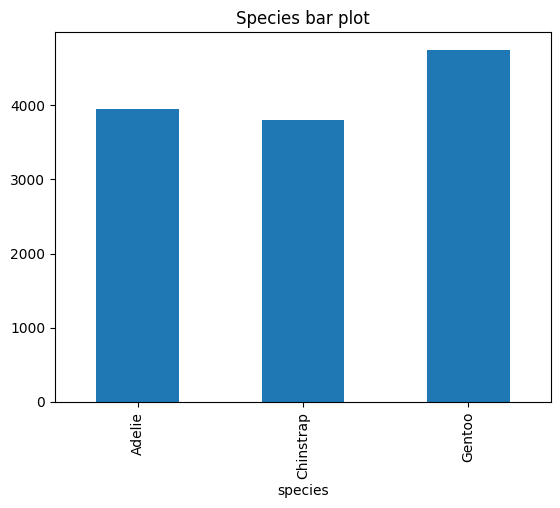

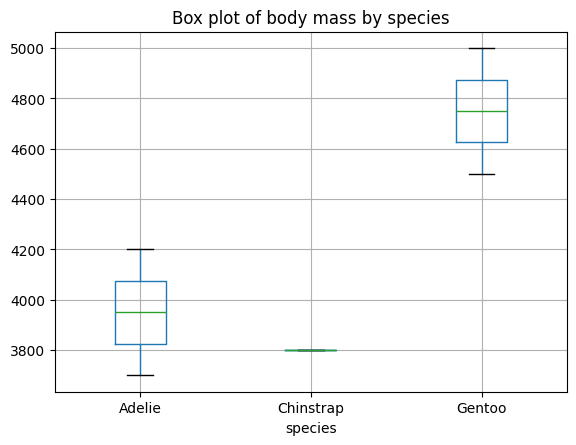

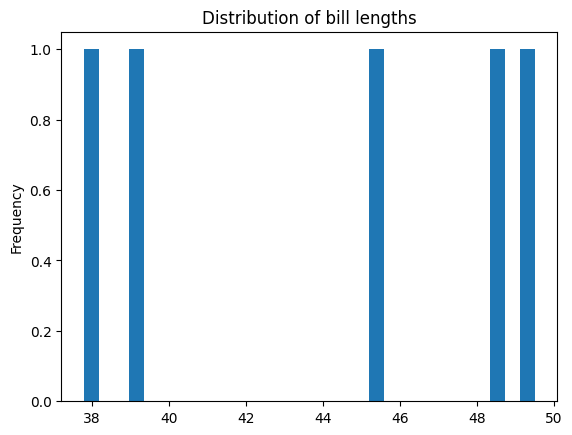

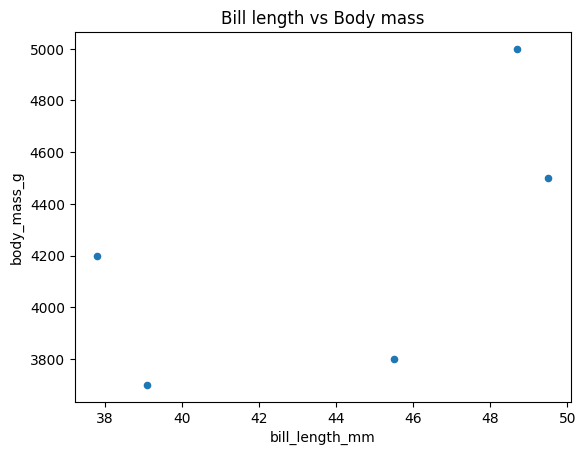

In [75]:
species_group = df.groupby('species')['body_mass_g'].mean()

species_group.plot.bar(title="Species bar plot")
plt.show()

df.boxplot(column="body_mass_g", by='species')
plt.title("Box plot of body mass by species")
plt.suptitle("")  # Suppress the default title
plt.show()

df['bill_length_mm'].plot.hist(bins=30, title="Distribution of bill lengths")
plt.show()

df.plot.scatter(x='bill_length_mm', y='body_mass_g', title="Bill length vs Body mass")
plt.show()

## correlation

In [76]:
data = {
    'species': ['Adelie', 'Gentoo', 'Chinstrap', 'Adelie', 'Gentoo'],
    'island': ['Torgersen', 'Biscoe', 'Dream', 'Torgersen', 'Biscoe'],
    'sex': ['Male', 'Female', 'Female', 'Male', 'Female'],
    'body_mass_g': [3700, 5000, 3800, 4200, 4500],
    'flipper_length_mm': [181, 210, 195, 190, 200],
    'bill_length_mm': [39.1, 48.7, 45.5, 37.8, 49.5]
}

df = pd.DataFrame(data)
df.head()

,species,island,sex,body_mass_g,flipper_length_mm,bill_length_mm
0,Adelie,Torgersen,Male,3700,181,39.1
1,Gentoo,Biscoe,Female,5000,210,48.7
2,Chinstrap,Dream,Female,3800,195,45.5
3,Adelie,Torgersen,Male,4200,190,37.8
4,Gentoo,Biscoe,Female,4500,200,49.5


In [77]:
numerical_columns = df.select_dtypes(include=['number'])

correlation_matrix = numerical_columns.corr()
print("Correlation Matrix:")
print(correlation_matrix)

corr_val = df['bill_length_mm'].corr(df['body_mass_g'])
print("\nCorrelation between bill_length_mm and body_mass_g:")
print(corr_val)

Correlation Matrix:
                   body_mass_g  flipper_length_mm  bill_length_mm
body_mass_g           1.000000           0.886266        0.628842
flipper_length_mm     0.886266           1.000000        0.841533
bill_length_mm        0.628842           0.841533        1.000000

Correlation between bill_length_mm and body_mass_g:
0.6288423944661753
